# Building Image Classifier Model Using ANN

In [1]:
#importing req libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [40]:
#importing Data 
fashion_mnist=keras.datasets.fashion_mnist
(x_train, y_train) , (x_test,y_test)=fashion_mnist.load_data()

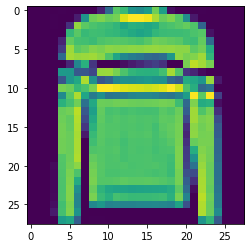

In [4]:
plt.imshow(x_train[5])

In [5]:
#it show img belong to which class 
y_train[5]

2

In [6]:
#we give this class no their lables
class_names=["T-shirt/Top","Traouser", 'Pullover' , 'Dress' , 'Coat',
             'Sandal' , 'Shirt' ,'Sneaker' , 'Bag' , 'Ankle Boot']

In [8]:
class_names[y_train[5]]

'Pullover'

In [9]:
#it show data in there pixal format 
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

# Data Normalization 

In [41]:
#to convert pixles into 0 and 1 we divide it by 255 since its the max pixle intensity 
#in pixles intensity  0 denote black colour and 255 is for white 

x_train_n=x_train/255.
x_test_n=x_test/255.

#we dividing value by float

# Spliting the Data 

train data

validation data 

test data 

In [42]:

x_valid ,x_train=x_train_n[:5000] ,x_train_n[5000:]
y_valid , y_train=y_train[:5000] , y_train[5000:]
x_test=x_test_n

In [43]:
x_valid[0]
#it gives pixle value of image 1 in range 0-1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [44]:
#genratring random seeds 
np.random.seed(42)
tf.random.set_seed(42)

In [45]:
#ceating modle 
model=keras.models.Sequential()
#building input layer 
#since image is in the form of 2 dim array we are flating it
model.add(keras.layers.Flatten(input_shape=[28,28]))
 

#adding 1st hidden layer with 300 neurons 
model.add(keras.layers.Dense(300,activation="relu"))

#adding 2nd hidden layer with 100 neurons 
model.add(keras.layers.Dense(100,activation="relu"))

#output layer (we have 10 diffrent categories)
model.add(keras.layers.Dense(10,activation="softmax"))


In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


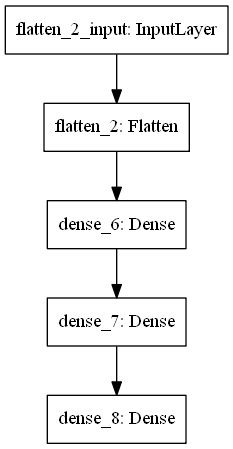

In [47]:
import pydot
keras.utils.plot_model(model)

In [48]:
#seeing the parameter weights and biases
weights,biases=model.layers[1].get_weights()

In [49]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [50]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [51]:
weights.shape

(784, 300)

In [52]:
biases.shape

(300,)

# compiling and traing the Model

In [53]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd" #stocastic gradian decent(sgd)
             ,metrics=["accuracy"]) 

In [54]:
#fiitng the model
model_fit=model.fit(x_train ,y_train, epochs=30,
                    validation_data=(x_valid,y_valid))
       

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.7226 - accuracy: 0.7640 - val_loss: 0.5076 - val_accuracy: 0.8314
Epoch 2/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4843 - accuracy: 0.8323 - val_loss: 0.4535 - val_accuracy: 0.8490
Epoch 3/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.4415 - accuracy: 0.8462 - val_loss: 0.4379 - val_accuracy: 0.8486
Epoch 4/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.4130 - accuracy: 0.8548 - val_loss: 0.4151 - val_accuracy: 0.8556
Epoch 5/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.3927 - accuracy: 0.8615 - val_loss: 0.3811 - val_accuracy: 0.8648
Epoch 6/30
55000/55000 [==============================] - 4s 78us/sample - loss: 0.3771 - accuracy: 0.8663 - val_loss: 0.3731 - val_accuracy: 0.8686
Epoch 7/30
55000/55000 [==============================] -

In [55]:
model_fit.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [56]:
model_fit.history

{'loss': [0.7225641793077642,
  0.48429402501799845,
  0.4414694448210976,
  0.4130110023650256,
  0.3927132744095542,
  0.3770842344977639,
  0.3625044732483951,
  0.35173157379952347,
  0.34206351447972383,
  0.33254772261272775,
  0.32400663858327,
  0.31581870070154017,
  0.30723480990366503,
  0.30144487034624273,
  0.2951630609143864,
  0.289617906052416,
  0.28313996095874094,
  0.2782157500895587,
  0.27280282401171596,
  0.2677568714250218,
  0.26316941008892925,
  0.25732083782391113,
  0.2537030367331071,
  0.24898536282669415,
  0.24503497376008468,
  0.2406168993321332,
  0.23654660925865173,
  0.23208795406601646,
  0.22838890849677,
  0.22548202377341012],
 'accuracy': [0.76403636,
  0.83232725,
  0.84623635,
  0.85481817,
  0.8614909,
  0.86625457,
  0.8728909,
  0.87512726,
  0.8770364,
  0.88061816,
  0.88356364,
  0.8867091,
  0.8896,
  0.8921091,
  0.89370906,
  0.89663637,
  0.8987455,
  0.8996364,
  0.90205455,
  0.9043091,
  0.9043273,
  0.90727276,
  0.90909094,

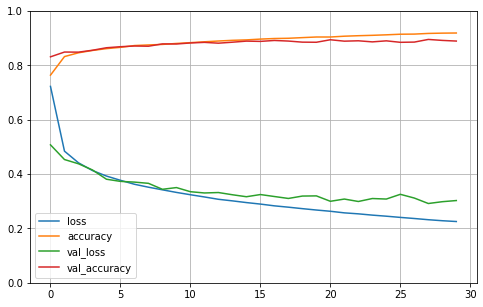

In [57]:
#ploting the history 

pd.DataFrame(model_fit.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [58]:
#model prediction
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.3349 - accuracy: 0.8802


[0.33488524657487867, 0.8802]

In [59]:
#testing 

x_new=x_test[:3]

In [60]:
#predicting the prob of class in which image  belong 
y_prob=model.predict(x_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [61]:
#to see the class
y_pred=model.predict_classes(x_new)
y_pred

array([9, 2, 1], dtype=int64)

In [62]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Traouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


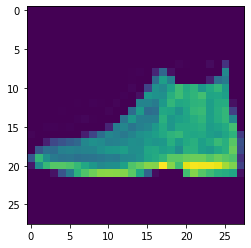

In [63]:
#lets see the image which are present 
print(plt.imshow(x_test[0]))

# print(plt.imshow(x_test[1]))

AxesImage(54,36;334.8x217.44)


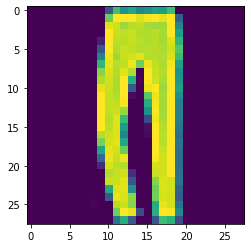

In [64]:
print(plt.imshow(x_test[2]))

# End

# Part 2 

# Saving and restoreing the model

In [65]:
model.save("ImageClassifer.h5")

In [66]:
#seeing the working dic
%pwd

'C:\\Users\\ADMIN\\Documents\\Machine learning with  Python'

In [67]:
del model

In [68]:
keras.backend.clear_session()

In [69]:
#importing saved model 
model=keras.models.load_model("ImageClassifer.h5")

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [71]:
y_pred = model.predict_classes(x_new)
print(y_pred)

[9 2 1]


# End